# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
pokemon = pd.read_csv(fp)

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

### From the plot, I observed....
Results: There is a positive correlation between `Attack` and `Defense`. The hit-points (`HP`) is higher for Pokemons with higher `Attack` and `Defense` values.

Text(0.5, 1.0, "Relationship between Pokemon's Attack, Defense, and Health")

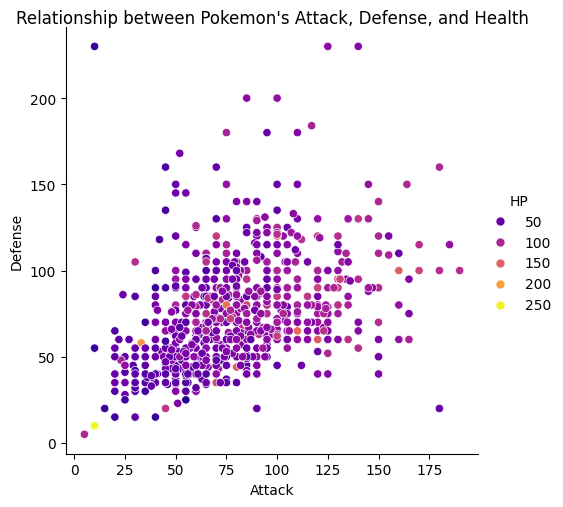

In [2]:
# Your code here . . .
sns.relplot(
    data=pokemon,
    x='Attack',
    y='Defense',
    hue='HP',
    palette='plasma'
)
plt.title('Relationship between Pokemon\'s Attack, Defense, and Health', pad=0.5)

## Answer
As a pokemon's attack increases, their defense also increases. There is a positive correlation between a pokemon's attack and defense.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

Text(0.5, 1.4, 'Attack vs total for all Pokemon')

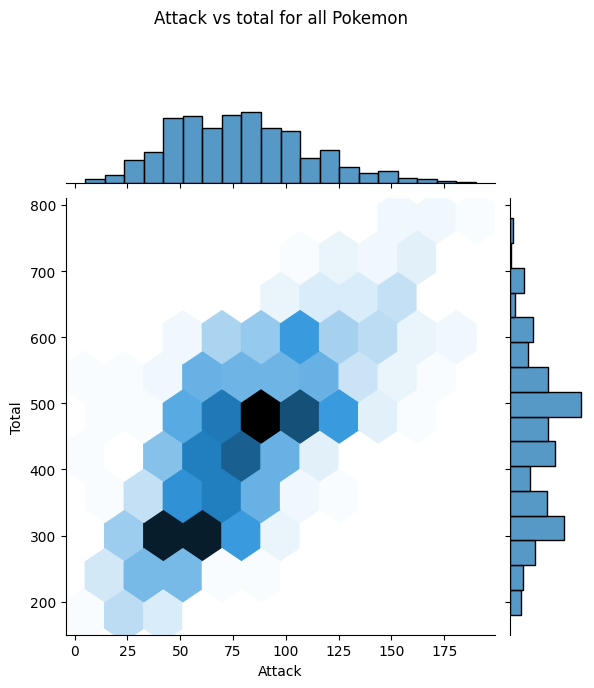

In [3]:
# Your code here . . .
sns.jointplot(
    data=pokemon,
    x='Attack',
    y='Total',
    kind='hex',
    gridsize=10
)

plt.title('Attack vs total for all Pokemon', pad=0.5, y=1.4)

From the plot, I observed....

## Answer
Aside from showing the relationship between a pokemon's attack and total, the plot also shows that there is a high concentration of pokemon that have around 50 attack damage with a total of 300. This means that a lot of pokemon have a sixth of their total stats as attack damage. There is also a high concentration of pokemon which have around 85 attack damage and a total of around 500. 

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

Text(0.5, 1.0, 'Counts of Pokemon Type 2')

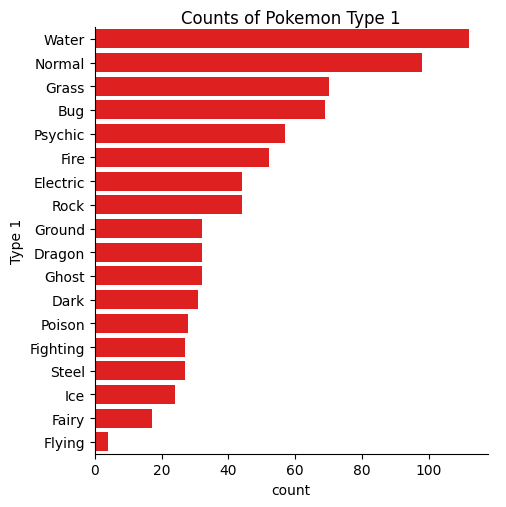

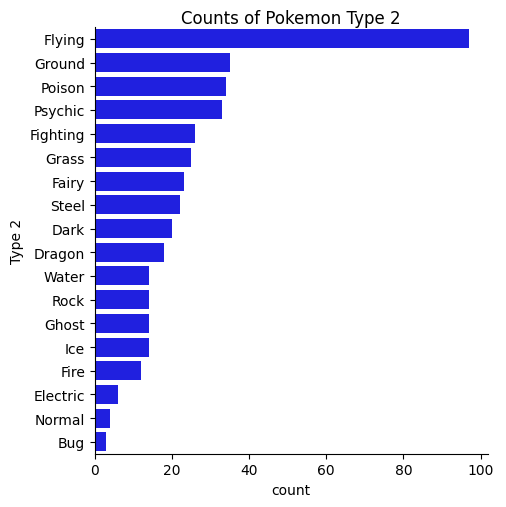

In [4]:
# Your code here . . .
orderType1 = pokemon.value_counts('Type 1').index
orderType2 = pokemon.value_counts('Type 2').index

sns.catplot(
    data=pokemon,
    y='Type 1',
    color='red',
    kind='count',
    order=orderType1
)
plt.title("Counts of Pokemon Type 1", pad=0.5)

sns.catplot(
    data=pokemon,
    y='Type 2',
    color='blue',
    kind='count',
    order=orderType2
)
plt.title("Counts of Pokemon Type 2", pad=0.5)

## Answer
The most common Type 1 pokemon is Water, while the most common Type 2 pokemon is Flying. The rarest Type 1 pokemon is Flying, while the rarest Type 2 pokemon is Bug.

## Q4-6: Your own question
Come up with three more questions to further explore the pokemon dataset.

Your question(s) . . .

## Q4. How many legendary pokemons were in each generation? Which generation had the most legendary pokemons?

Text(0.5, 1.0, 'Count of Legendary Pokemon for each Generation')

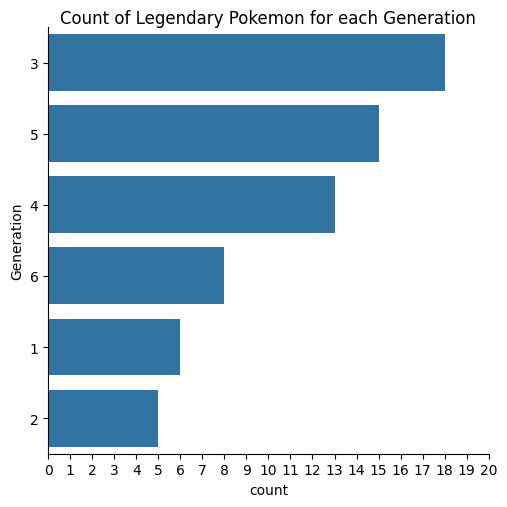

In [5]:
legendary_pokemon = pokemon[pokemon['Legendary'] == True]

order = legendary_pokemon.value_counts('Generation').index

sns.catplot(
    data=legendary_pokemon,
    y='Generation',
    kind='count',
    order=order
)

plt.xticks(range(0,21))
plt.title("Count of Legendary Pokemon for each Generation", pad=0.5)

## Answer
The generation that has the most legendary pokemon is generation 3 with 18 legendary pokemons. The other generations from most to least legendary pokemons are generations 5, 4, 6, 1, and 2 with 15, 13, 8, 6, and 5 legendary pokemons, respectively.

## Q5. What is the relationship between a pokemon's health and its defense? What is that relationship compared to each pokemon's speed?

Text(0.5, 1.0, "Relationship between a Pokemon's HP, Defense, and Speed")

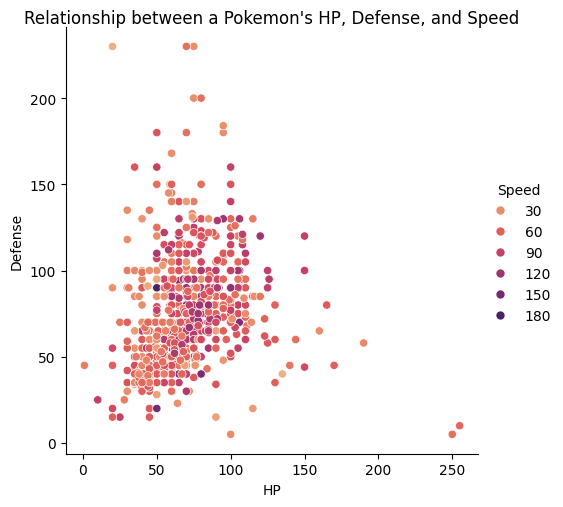

In [6]:
sns.relplot(
    data=pokemon,
    x='HP',
    y='Defense',
    hue='Speed',
    palette='flare'
)

plt.title("Relationship between a Pokemon's HP, Defense, and Speed", pad=0.5)

## Answer
It seems like as a few pokemon's health increases, it gets less defense. However, most pokemon's health and defense increase when both stats are below 150. The majority of pokemon have around 100 health and 100 defense, with a high speed. The pokemon that either specializes in only defense or health seem to be slower than most other pokemon.

## Q6. What is the average distribution of attack damage for each pokemon primary type and how does it compare to legendary pokemon of the same type?

Text(0.5, 1.0, 'Distribution of Attack Damage by Each Type of Pokemon\n(Non-legendary vs Legendary)')

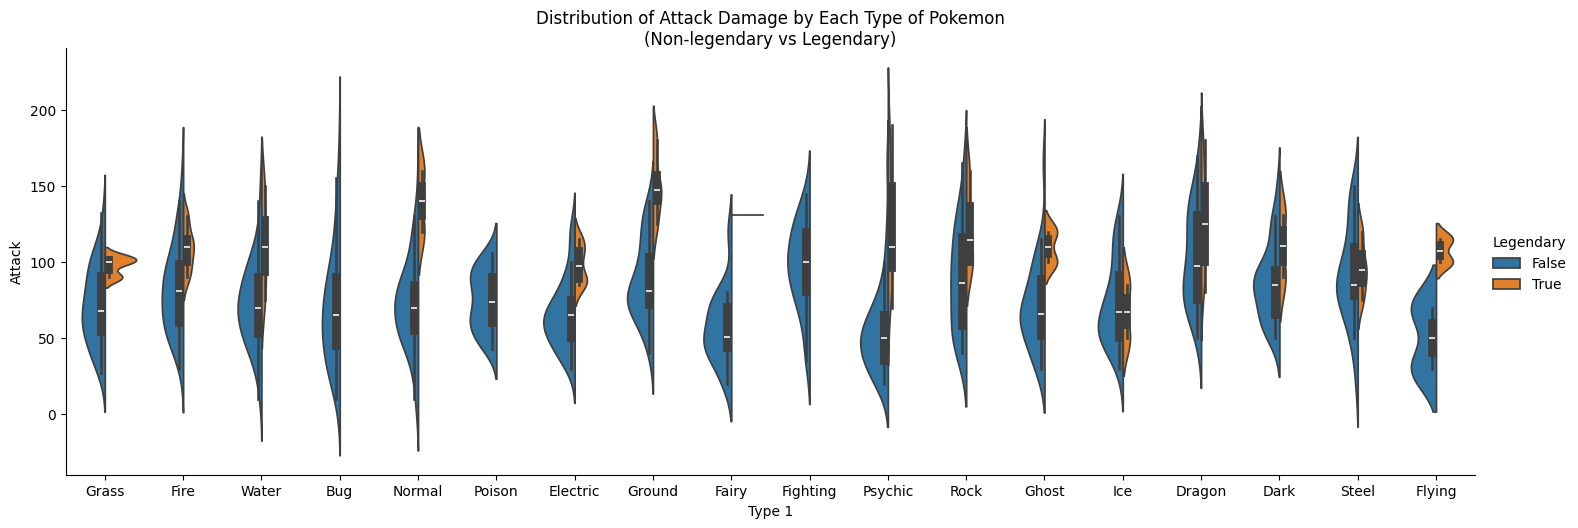

In [11]:
# Your code here . . .
sns.catplot(
    data=pokemon,
    x='Type 1',
    y='Attack',
    kind='violin',
    bw_method=0.5,
    aspect=3,
    split=True,
    hue='Legendary'
)

plt.title("Distribution of Attack Damage by Each Type of Pokemon\n(Non-legendary vs Legendary)", pad=0.5)

## Answer
The distribution of attack damage between each type of non-legendary pokemon seem to be roughly the same, averaging near 75 attack damage. Fairy, Flying, and Psychic seems to have a lower distribution of attack damage than the rest. For legendary pokemon, they all have a higher distribution than non-legendary pokemon, except for Ice types. The highest distribution of attack damage for a type is the Ground type.